## Motives
- ### Global Factors
- ### Top 2 competitive Countries and Their Strong Zones or The reason for doing well.
- ### Among them about My Country.

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# For show all columns and full value of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',300)

# Colors
color_pal = sns.color_palette()
plt.style.use('ggplot')

In [55]:
csvs = glob('../input/*/*20*_responses*.csv')
csvs

['../input/2020-kaggle-data-science-machine-learning-survey/2020_kaggle_ds_and_ml_survey_responses_only.csv',
 '../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv',
 '../input/2021-kaggle-data-science-machine-learning-survey/2019_kaggle_ds_and_ml_survey_responses_only.csv',
 '../input/2021-kaggle-data-science-machine-learning-survey/2020_kaggle_ds_and_ml_survey_responses_only.csv',
 '../input/2021-kaggle-data-science-machine-learning-survey/2018_kaggle_ds_and_ml_survey_responses_only.csv',
 '../input/2021-kaggle-data-science-machine-learning-survey/2017_kaggle_ds_and_ml_survey_responses_only.csv',
 '../input/2021-kaggle-data-science-machine-learning-survey/2021_kaggle_ds_and_ml_survey_responses_only.csv']

In [56]:
csvs_mapping = {
 2018: '../input/2021-kaggle-data-science-machine-learning-survey/2018_kaggle_ds_and_ml_survey_responses_only.csv',
 2019: '../input/2021-kaggle-data-science-machine-learning-survey/2019_kaggle_ds_and_ml_survey_responses_only.csv',
 2020: '../input/2020-kaggle-data-science-machine-learning-survey/2020_kaggle_ds_and_ml_survey_responses_only.csv',
 2021: '../input/2021-kaggle-data-science-machine-learning-survey/2021_kaggle_ds_and_ml_survey_responses_only.csv',
 2022: '../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv'
}

In [57]:
responses = {}
questions = {}
df = []
for year, csv in csvs_mapping.items():
    print(year)
    df_temp = pd.read_csv(csv, low_memory=False).assign(year = year)
    questions[year] = df_temp.loc[0].to_dict() # taking only the questions of every year.
    responses[year] = df_temp.drop(0).reset_index(drop=True) # dropping the questions/(actual questions) by using pd.drop(0) ~ 0 stands for 1st row
    df.append(pd.read_csv(csvs_mapping[year], low_memory=False, header=1).assign(year = year)) # dropping the columns by setting header=1
df = pd.concat(df)

2018
2019
2020
2021
2022


In [58]:
df.head()

Duration (in seconds) What is your gender? - Selected Choice  \
0                    710                                 Female   
1                    434                                   Male   
2                    718                                 Female   
3                    621                                   Male   
4                    731                                   Male   

   What is your gender? - Prefer to self-describe - Text  \
0                                                   -1.0   
1                                                   -1.0   
2                                                   -1.0   
3                                                   -1.0   
4                                                   -1.0   

  What is your age (# years)? In which country do you currently reside?  \
0                       45-49                  United States of America   
1                       30-34                                 Indonesia   
2                       30-34                  United States of America   
3                       35-39                  United States of America   
4                       22-24                                     India   

  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
0                                                                                                 Doctoral degree   
1                                                                                             Bachelorâs degree   
2                                                                                               Masterâs degree   
3                                                                                               Masterâs degree   
4                                                                                               Masterâs degree   

  Which best describes your undergraduate major? - Selected Choice  \
0                                                            Other   
1                               Engineering (non-computer focused)   
2                    Computer science (software engineering, etc.)   
3      Social sciences (anthropology, psychology, sociology, etc.)   
4                                        Mathematics or statistics   

  Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
0                                                                                              Consultant   
1                                                                                                   Other   
2                                                                                          Data Scientist   
3                                                                                            Not employed   
4                                                                                            Data Analyst   

   Select the title most similar to your current role (or most recent title if retired): - Other - Text  \
0                                                                                                  -1.0   
1                                                                                                   0.0   
2                                                                                                  -1.0   
3                                                                                                  -1.0   
4                                                                                                  -1.0   

  In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice  \
0                                                                                                           Other   
1                                                                                       Manufacturing/Fabrication   
2              

In [59]:
df.shape

(113582, 1128)

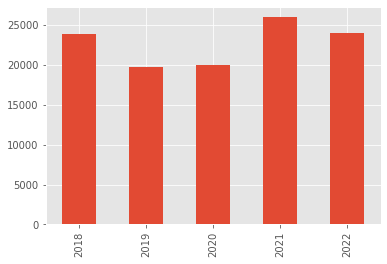

In [60]:
df['year'].value_counts().sort_index().plot(kind='bar')
plt.show()

### Why do the year 2020 and 2019 total responses seem similar?

In [61]:
year_responses = df['year'].value_counts().sort_index()
year_responses

2018    23859
2019    19717
2020    20036
2021    25973
2022    23997
Name: year, dtype: int64

In [62]:
year_responses[2020] - year_responses[2019]

319

#### The Difference is very few.

### Groupping

In [63]:
country = df.groupby('year')['In which country do you currently reside?']

In [64]:
country.value_counts()

year  In which country do you currently reside?
2018  United States of America                     4716
      India                                        4417
      China                                        1644
      Other                                        1036
      Russia                                        879
                                                   ... 
2022  Ireland                                        53
      Belgium                                        51
      Romania                                        50
      Czech Republic                                 49
      I do not wish to disclose my location          42
Name: In which country do you currently reside?, Length: 241, dtype: int64

In [65]:
post_unstack_country = country.value_counts().unstack()
post_unstack_country

In which country do you currently reside?,Algeria,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,Brazil,Cameroon,Canada,Chile,China,Colombia,Czech Republic,Denmark,Ecuador,Egypt,Ethiopia,Finland,France,Germany,Ghana,Greece,Hong Kong (S.A.R.),Hungary,I do not wish to disclose my location,India,Indonesia,"Iran, Islamic Republic of...",Ireland,Israel,Italy,Japan,Kenya,Malaysia,Mexico,Morocco,Nepal,Netherlands,New Zealand,Nigeria,Norway,Other,Pakistan,Peru,Philippines,Poland,Portugal,Republic of Korea,Romania,Russia,Saudi Arabia,Singapore,South Africa,South Korea,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Viet Nam,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,NaN,119.0,330.0,62.0,107.0,91.0,111.0,736.0,NaN,604.0,76.0,1644.0,128.0,72.0,106.0,NaN,96.0,NaN,79.0,604.0,734.0,NaN,121.0,76.0,93.0,394.0,4417.0,171.0,113.0,101.0,173.0,355.0,597.0,85.0,113.0,202.0,71.0,NaN,270.0,77.0,208.0,74.0,1036.0,161.0,81.0,73.0,301.0,155.0,71.0,79.0,879.0,NaN,186.0,147.0,188.0,485.0,NaN,155.0,164.0,NaN,73.0,74.0,327.0,252.0,NaN,702.0,4716.0,144.0,NaN
2019,58.0,123.0,269.0,53.0,136.0,68.0,70.0,728.0,NaN,450.0,91.0,574.0,168.0,58.0,55.0,NaN,122.0,NaN,NaN,387.0,531.0,NaN,108.0,64.0,56.0,NaN,4786.0,167.0,96.0,89.0,104.0,271.0,673.0,114.0,80.0,195.0,123.0,NaN,161.0,51.0,395.0,51.0,1054.0,210.0,74.0,65.0,212.0,114.0,73.0,58.0,626.0,50.0,156.0,120.0,182.0,399.0,NaN,92.0,97.0,301.0,67.0,68.0,288.0,191.0,NaN,482.0,3085.0,128.0,NaN
2020,NaN,134.0,231.0,NaN,143.0,59.0,60.0,694.0,NaN,301.0,85.0,474.0,177.0,NaN,NaN,NaN,179.0,NaN,NaN,330.0,404.0,52.0,111.0,NaN,NaN,NaN,5851.0,290.0,162.0,54.0,97.0,267.0,638.0,153.0,133.0,227.0,133.0,62.0,151.0,NaN,476.0,NaN,1388.0,283.0,95.0,99.0,148.0,122.0,76.0,61.0,582.0,76.0,149.0,141.0,190.0,336.0,72.0,78.0,68.0,267.0,132.0,99.0,344.0,170.0,59.0,489.0,2237.0,147.0,NaN
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401.0,NaN,NaN,NaN,NaN,NaN,NaN,7434.0,NaN,NaN,NaN,NaN,NaN,921.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,702.0,NaN,10876.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN,742.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.0,NaN,NaN,550.0,2650.0,NaN,NaN
2022,62.0,204.0,142.0,NaN,251.0,NaN,51.0,833.0,68.0,257.0,115.0,453.0,256.0,49.0,NaN,54.0,383.0,98.0,NaN,262.0,99.0,107.0,NaN,58.0,NaN,42.0,8792.0,376.0,120.0,53.0,102.0,182.0,556.0,201.0,74.0,380.0,177.0,75.0,108.0,NaN,731.0,NaN,1430.0,620.0,121.0,108.0,113.0,87.0,NaN,50.0,324.0,84.0,68.0,109.0,317.0,257.0,77.0,NaN,NaN,242.0,132.0,125.0,345.0,79.0,94.0,258.0,2920.0,212.0,54.0


In [66]:
post_unstack_country.sum(axis=0).sort_values(ascending=False)

In which country do you currently reside?
India                       31280.0
Other                       15784.0
United States of America    15608.0
Brazil                       3742.0
Japan                        3385.0
                             ...   
Ethiopia                       98.0
Finland                        79.0
Cameroon                       68.0
Ecuador                        54.0
Zimbabwe                       54.0
Length: 69, dtype: float64

### Top 5 and my Country

In [67]:
top_5 = post_unstack_country.sum(axis=0).sort_values(ascending=False).index[:5].to_list()
top_5.append('Bangladesh')
top_5

['India', 'Other', 'United States of America', 'Brazil', 'Japan', 'Bangladesh']

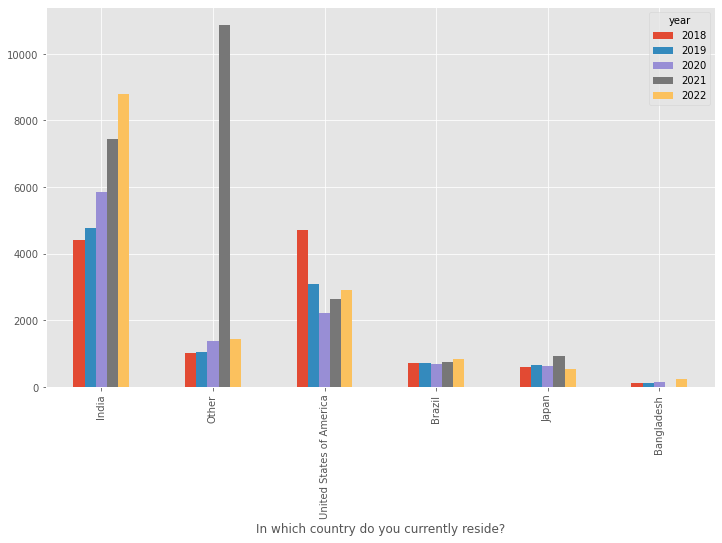

In [68]:
# post_unstack_country[top_5].plot(kind='bar', figsize=(12, 7))
post_unstack_country[top_5].T.plot(kind='bar', figsize=(12, 7))
plt.show()

#### The **Other Countries** responses of 2021 seem odd!

In [69]:
responses[2022].Q4.value_counts()

India                                                   8792
United States of America                                2920
Other                                                   1430
Brazil                                                   833
Nigeria                                                  731
Pakistan                                                 620
Japan                                                    556
China                                                    453
Egypt                                                    383
Mexico                                                   380
Indonesia                                                376
Turkey                                                   345
Russia                                                   324
South Korea                                              317
France                                                   262
United Kingdom of Great Britain and Northern Ireland     258
Spain                   

In [70]:
responses[2021].Q3.value_counts()

Other                                                   10876
India                                                    7434
United States of America                                 2650
Japan                                                     921
Brazil                                                    751
Russia                                                    742
Nigeria                                                   702
United Kingdom of Great Britain and Northern Ireland      550
Pakistan                                                  530
Turkey                                                    416
France                                                    401
Name: Q3, dtype: int64


#### It seems the **Option** is bet change after 2021. They have included more Countries as Options.
### So, I am going to continue without  **Other** Option. Let's see what's my country **Bangladesh** doing.

In [71]:
top_5 = post_unstack_country.sum(axis=0).sort_values(ascending=False).index[:6].to_list()
top_5_not_others = [i for i in top_5 if i != 'Other']
top_5_not_others.append('Bangladesh')
top_5_not_others

['India',
 'United States of America',
 'Brazil',
 'Japan',
 'Russia',
 'Bangladesh']

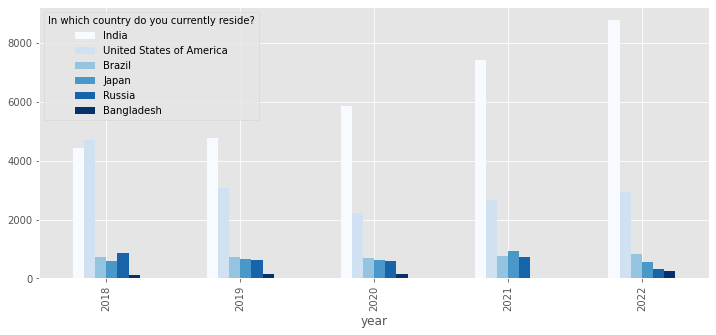

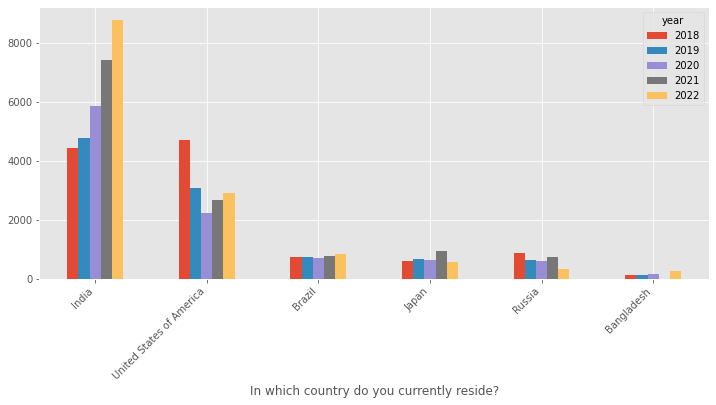

In [72]:
post_unstack_country[top_5_not_others].plot(kind='bar', figsize=(12, 5), cmap='Blues')
post_unstack_country[top_5_not_others].T.plot(kind='bar', figsize=(12, 5))
plt.xticks(rotation=45, ha='right')
plt.show()

### Reformating data
 - setting the base to ```top_5_not_others```

In [73]:
"""
- subset the data (only country exist in top_5_not_others)
- This is the baseline
"""
df_top5 = df.loc[df['In which country do you currently reside?'].isin(top_5_not_others)].reset_index(drop=True).copy().rename(columns={
    'In which country do you currently reside?': 'Country',
    'What is your gender? - Selected Choice': 'Gender',
    'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'Education',
    'What is your age (# years)?': 'Age'
    
})


### What is your age (# years)?

In [74]:
df_top5_g_age = df_top5.groupby(['year', 'Country'])['Age'].value_counts().unstack().fillna(0).astype('int')
df_top5_g_age

Age                            18-21  22-24  25-29  30-34  35-39  40-44  \
year Country                                                              
2018 Bangladesh                   15     49     28      9      3      2   
     Brazil                       85    134    205    127     83     41   
     India                      1225   1196    986    513    256    123   
     Japan                        39     87    143     99     82     65   
     Russia                      140    181    236    152     77     40   
     United States of America    393    770   1187    864    506    296   
2019 Bangladesh                   12     63     43      9      3      2   
     Brazil                       43     82    181    137    101     78   
     India                      1405   1261    994    533    271    182   
     Japan                        30     82    154    125     87     66   
     Russia                       87    106    141    130     68     41   
     United States of America    159    323    637    557    405    274   
2020 Bangladesh                   23     68     36      9      3      4   
     Brazil                       52     82    156    108    100     71   
     India                      2059   1517   1056    532    313    174   
     Japan                        43     71    114     92     74     66   
     Russia                       91     87    113    121     81     36   
     United States of America    121    187    383    398    296    232   
2021 Brazil                       50     78    161    135    108     82   
     India                      2719   1795   1275    695    407    284   
     Japan                        64     93    169    140     99     95   
     Russia                      112    107    132    135     97     61   
     United States of America    167    250    402    407    340    260   
2022 Bangladesh                   26     98     73     11     18     18   
     Brazil                       45     81    139    135    131    100   
     India                      2959   2037   1593    837    556    415   
     Japan                        29     34     76     73     64     79   
     Russia                       77     62     54     52     30     20   
     United States of America    175    256    413    430    406    335   

Age                            45-49  50-54  55-59  60-69  70+  70-79  80+  
year Country                                                                
2018 Bangladesh                    1      0      0      0    0      0    0  
     Brazil                       18     21     13      7    0      2    0  
     India                        62     32     12      9    0      3    0  
     Japan                        38     17      9     12    0      6    0  
     Russia                       27     10      8      4    0      1    3  
     United States of America    221    190    131    130    0     18   10  
2019 Bangladesh                    2      0      1      0    1      0    0  
     Brazil                       40     30     18     15    3      0    0  
     India                        73     38     13     13    3      0    0  
     Japan                        56     35     20     17    1      0    0  
     Russia                       20      8     14      6    5      0    0  
     United States of America    233    172    144    141   40      0    0  
2020 Bangladesh                    0      0      0      0    0      0    0  
     Brazil                       49     36     25     15    0      0    0  
     India                       106     45     33     13    3      0    0  
     Japan                        69     45     30     30    4      0    0  
     Russia                       26     12      6      8    1      0    0  
     United States of America    169    174    107    139   31      0    0  
2021 Brazil                       50     37     32     17    1      0    0  
     India                       141     59     33     20

### **The Young Indians are taking over.**

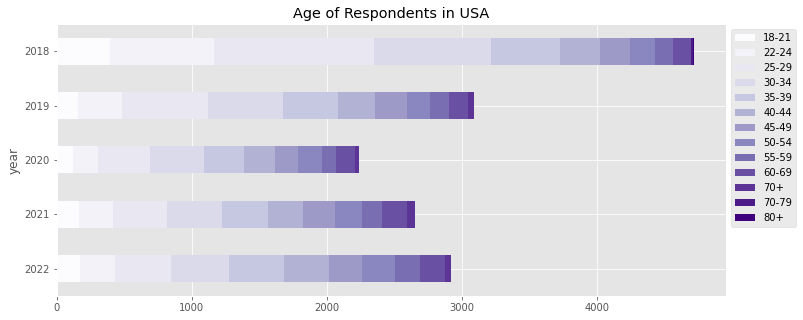

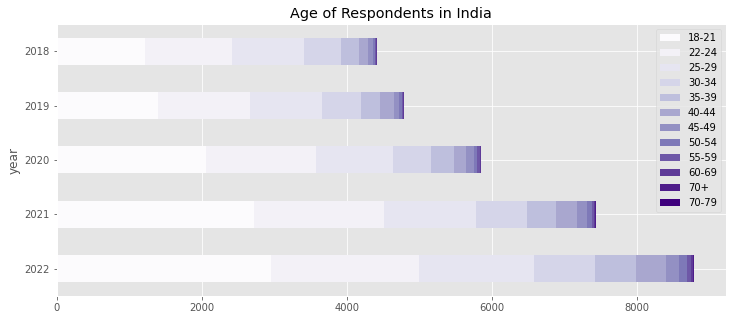

In [75]:
ax = df_top5.query('Country == "United States of America"')\
.groupby(['year', 'Age']).size().unstack()\
.sort_index(ascending=False)\
.plot(kind='barh', stacked=True, cmap='Purples', figsize=(12, 5))

ax.legend(bbox_to_anchor=(1, 1))
plt.title('Age of Respondents in USA')
plt.show()


# for India
ax = df_top5.query('Country == "India"')\
.groupby(['year', 'Age']).size().unstack()\
.sort_index(ascending=False)\
.plot(kind='barh', stacked=True, cmap='Purples', figsize=(12, 5))

ax.legend(bbox_to_anchor=(1, 1))
plt.title('Age of Respondents in India')
plt.show()



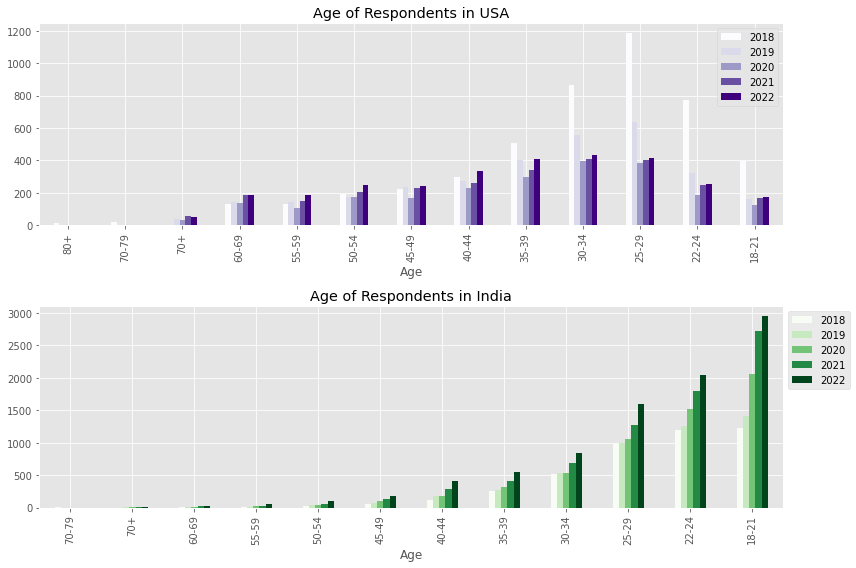

In [76]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
ax = (
    df_top5.query('Country == "United States of America"')\
    .groupby(['Age', 'year']).size()\
    .unstack()\
    .sort_index(ascending=False)\
    .plot(kind='bar',
          stacked=False,
          cmap='Purples',
          ax=axs[0],
          title='Age of Respondents in USA')
)
axs[0].legend(bbox_to_anchor=(1, 1))

ax = (
    df_top5.query('Country == "India"')\
    .groupby(['Age', 'year']).size()\
    .unstack()\
    .sort_index(ascending=False)\
    .plot(kind='bar',
          stacked=False,
          cmap='Greens',
          ax=axs[1],
          title='Age of Respondents in India')
)
axs[1].legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### About my Country(Bangladesh)

In [77]:
# df_top5.groupby(['year', 'Country'])['Age'].value_counts().unstack().fillna(0).astype('int').query()
df_top5_g_age.query('Country == "Bangladesh"')

,Age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+,70-79,80+
year,Country,,,,,,,,,,,,,
2018,Bangladesh,15,49,28,9,3,2,1,0,0,0,0,0,0
2019,Bangladesh,12,63,43,9,3,2,2,0,1,0,1,0,0
2020,Bangladesh,23,68,36,9,3,4,0,0,0,0,0,0,0
2022,Bangladesh,26,98,73,11,18,18,6,1,0,0,0,0,0


### What is your gender? - Selected Choice

Have to work with
- Male ~ Man
- Female ~ Woman

In [78]:
df_top5['Gender'] = df_top5['Gender'].str.replace('Man', 'Male').str.replace('Woman', 'Female')

In [79]:
df_top5_g_gender = df_top5.groupby('year')['Gender'].value_counts().unstack().fillna(0).astype('int')
df_top5_g_gender

Gender,Female,Male,Nonbinary,Prefer not to say,Prefer to self-describe
year,,,,,
2018,1964,9316,0,130,42
2019,1612,8270,0,130,22
2020,2011,7969,24,120,21
2021,2515,9760,0,0,223
2022,3232,10194,46,185,19


In [80]:
df_top5['Education'] = df_top5['Education'].str.replace("â", "’")

In [81]:
df_top5_g_edu = df_top5.groupby('year')['Education'].value_counts().unstack().fillna(0).astype('int')
df_top5_g_edu

Education,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Professional doctorate,Some college/university study without earning a bachelor’s degree
year,,,,,,,,
2018,4073,1348,153,4849,104,297,0,463
2019,3606,1146,166,4126,96,319,0,378
2020,4239,888,195,3671,87,342,0,500
2021,5454,1048,328,4640,165,0,162,701
2022,4870,1229,880,5093,270,0,320,669


In [82]:
top_5_not_others

['India',
 'United States of America',
 'Brazil',
 'Japan',
 'Russia',
 'Bangladesh']

### Reading Data

### **Objectives:**
#### 1. **Tell a data story about a subset of the data science community represented in this survey**.
#### 2. The challenge is to deeply **explore (through data) the impact, priorities, or concerns of a specific group** of data science and machine learning practitioners.
#### That group can be defined in the macro 
>#### (for example: anyone who does most of their coding in Python)

#### or the micro 
>#### (for example: female data science students studying machine learning in masters programs). 
#### This is an opportunity to be creative and tell the story of a community you identify with or are passionate about!